In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
df.sample(4)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
6382,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11182,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41558,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31182,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import matplotlib.pyplot as plt

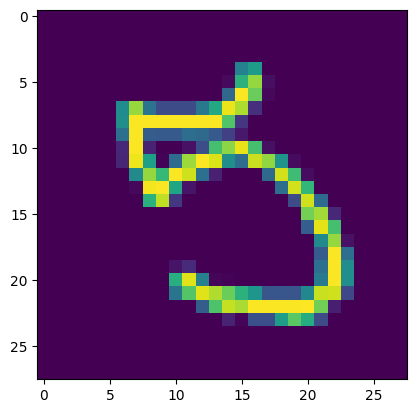

In [6]:
plt.imshow(df.iloc[1306,1:].values.reshape(28,28))

In [7]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [8]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train , Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42 )

In [9]:
X_train.shape

(33600, 784)

In [10]:
X_test.shape

(8400, 784)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier()

In [13]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [14]:
y_pred = knn.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.9648809523809524

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 100)

In [19]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [20]:
X_train.shape

(33600, 100)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [22]:
y_pred = knn.predict(X_test)

even with 100, we got 95% accuracy which is 1% less than accuracy got from 748 features

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.9523809523809523

In [24]:
X_train

array([[-2.71863016e+00, -4.89826948e-01,  1.13548195e+00, ...,
         7.89491170e-02,  1.79698732e-01,  6.19834733e-01],
       [-6.76979740e-01, -6.75362986e+00, -2.33590338e+00, ...,
         3.70516247e-01, -9.81649073e-01,  8.80430576e-01],
       [-3.03323303e+00,  6.50981675e+00,  7.49182488e+00, ...,
        -1.09342720e+00, -2.15876766e+00, -4.34683068e-03],
       ...,
       [ 2.14883487e+00,  7.80786254e-01, -7.47386872e-01, ...,
         1.18870295e+00, -4.41223433e-01,  2.02439223e-01],
       [ 1.05956686e+00,  9.47676248e-01,  3.94974557e+00, ...,
        -1.39832488e+00, -3.51940146e-01, -1.64389248e-01],
       [ 1.77025855e+01,  1.96187828e+00, -4.94354852e+00, ...,
        -7.82362697e-01, -6.64821696e-01,  2.76924901e+00]])